In [ ]:
#IMPORTING LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import tensorflow as tf
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from keras import callbacks
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, LSTM, Dropout, GRU, Bidirectional
from tensorflow.keras.optimizers.legacy import SGD
from tensorflow.keras.callbacks import EarlyStopping
import math
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings("ignore")


In [ ]:
#LOADING THE DATA

In [ ]:
#reading the CSV file
data=pd.read_csv("traffic.csv")

In [ ]:
data #printing the data

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041
...,...,...,...,...
48115,2017-06-30 19:00:00,4,11,20170630194
48116,2017-06-30 20:00:00,4,30,20170630204
48117,2017-06-30 21:00:00,4,16,20170630214
48118,2017-06-30 22:00:00,4,22,20170630224


In [ ]:
#size of the dataset
data.shape

(48120, 4)

In [ ]:
#first 5 data
data.head()

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


In [ ]:
'''
From the above table we see the table that contains 4 features:
- DateTime
- Junction
- Vehicles
- ID
This dataset is a collection of number of vehicles at 4 junctions having
a time interval of 1 hr

'''

'\nFrom the above table we see the table that contains 4 features:\n- DateTime\n- Junction\n- Vehicles\n- ID\nThis dataset is a collection of number of vehicles at 4 junctions having\na time interval of 1 hr\n\n'

In [ ]:
#DATA EXPLORATION

In [ ]:
'''
We are going to perform the following for Data Exploration
-Parsing dates (convert to DateTime dtype)
-Ploting a time series
-Feature engineering for EDA

'''

'\nWe are going to perform the following for Data Exploration\n-Parsing dates (convert to DateTime dtype)\n-Ploting a time series\n-Feature engineering for EDA\n\n'

In [ ]:
#parsing dates
data["DateTime"]=pd.to_datetime(data["DateTime"])

In [ ]:
'''
Here, orginally the values under the DateTime column have the dtype as
Object, by parsing the dates we convert the dtype to dates dtype

'''

'\nHere, orginally the values under the DateTime column have the dtype as\nObject, by parsing the dates we convert the dtype to dates dtype\n\n'

In [ ]:
data['DateTime'].head()

,DateTime
0,2015-11-01 00:00:00
1,2015-11-01 01:00:00
2,2015-11-01 02:00:00
3,2015-11-01 03:00:00
4,2015-11-01 04:00:00


In [ ]:
#here we see the dtype has changed to datetime64

In [ ]:
#information of the entire dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   DateTime  48120 non-null  datetime64[ns]
 1   Junction  48120 non-null  int64         
 2   Vehicles  48120 non-null  int64         
 3   ID        48120 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 1.5 MB


In [ ]:
#creating a copy for EDA, does not affect the original dataset
df=data.copy()
df=df.drop(["ID"], axis=1)

Text(0.5, 0, 'Dates')

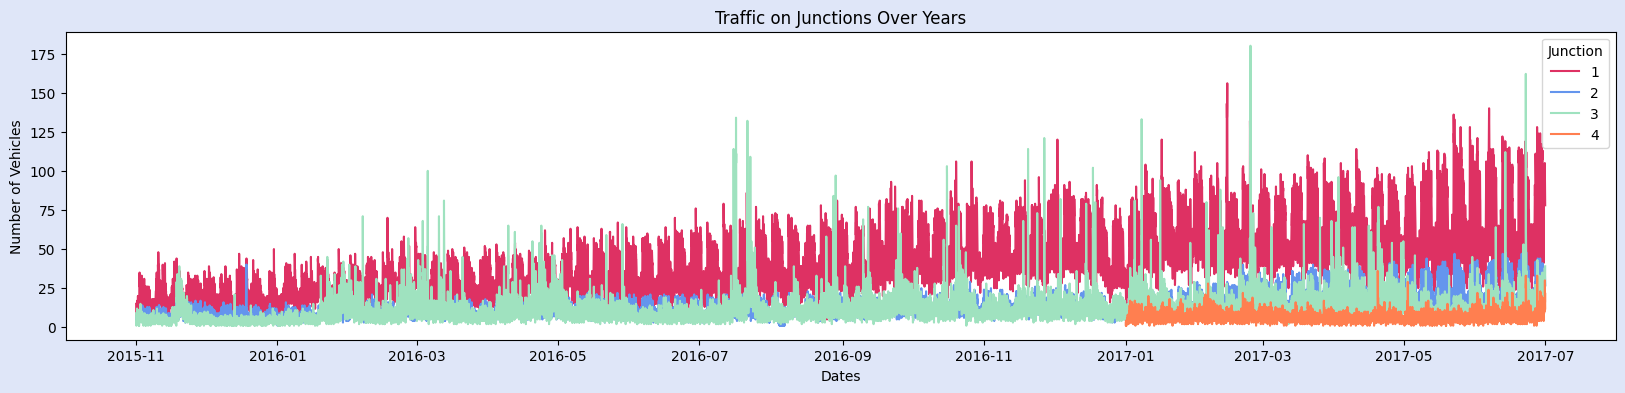

In [ ]:
#Now we are going to plot the Timeseries for better understanding of the dataset
colors=["#DE3163","#6495ED","#9FE2BF","#FF7F50"]
plt.figure(figsize=(20,4), facecolor="#DFE6F8")
Time_series=sns.lineplot(x=df["DateTime"], y="Vehicles", data=df, hue="Junction", palette=colors)
Time_series.set_title("Traffic on Junctions Over Years")
Time_series.set_ylabel("Number of Vehicles")
Time_series.set_xlabel("Dates")

In [ ]:
'''
From the above timeseries plot we observe:
-There is a continous upward trend in Junction 1 over the years.
Hence this means many vehicles use Junction 1.

-Junction 2 doesnt have a significant upward trend, but sparse increase
in number of vehicles is observed towards the end.

-Junction 3 has an up and down trend

-From the plot it is observed that Junction 4 starts only from the year 2017

'''

'\nFrom the above timeseries plot we observe:\n-There is a continous upward trend in Junction 1 over the years.\nHence this means many vehicles use Junction 1.\n\n-Junction 2 doesnt have a significant upward trend, but sparse increase\nin number of vehicles is observed towards the end.\n\n-Junction 3 has an up and down trend\n\n-From the plot it is observed that Junction 4 starts only from the year 2017\n\n'

In [ ]:
#FEATURE ENGINEERING

In [ ]:
'''
Here, we create few new features to have a better understanding of
the seasonality of the traffic.

We can do so by creating new features out of the DateTime column.
- Year
- Month
- Date in the given month
- Days of the week
- Hour (as time interval is hourly)

'''

'\nHere, we create few new features to have a better understanding of\nthe seasonality of the traffic.\n\nWe can do so by creating new features out of the DateTime column.\n- Year\n- Month\n- Date in the given month\n- Days of the week\n- Hour (as time interval is hourly)\n\n'

In [ ]:
#creating new features from an existing feature
df["Year"]=df["DateTime"].dt.year
df["Month"]=df["DateTime"].dt.month
df["Date_month"]=df["DateTime"].dt.day
df["Hour"]=df["DateTime"].dt.hour
df["Day"]=df.DateTime.dt.strftime("%A")

In [ ]:
df

,DateTime,Junction,Vehicles,Year,Month,Date_month,Hour,Day
0,2015-11-01 00:00:00,1,15,2015,11,1,0,Sunday
1,2015-11-01 01:00:00,1,13,2015,11,1,1,Sunday
2,2015-11-01 02:00:00,1,10,2015,11,1,2,Sunday
3,2015-11-01 03:00:00,1,7,2015,11,1,3,Sunday
4,2015-11-01 04:00:00,1,9,2015,11,1,4,Sunday
...,...,...,...,...,...,...,...,...
48115,2017-06-30 19:00:00,4,11,2017,6,30,19,Friday
48116,2017-06-30 20:00:00,4,30,2017,6,30,20,Friday
48117,2017-06-30 21:00:00,4,16,2017,6,30,21,Friday
48118,2017-06-30 22:00:00,4,22,2017,6,30,22,Friday


In [ ]:
#EXPLORATORY DATA ANALYSIS

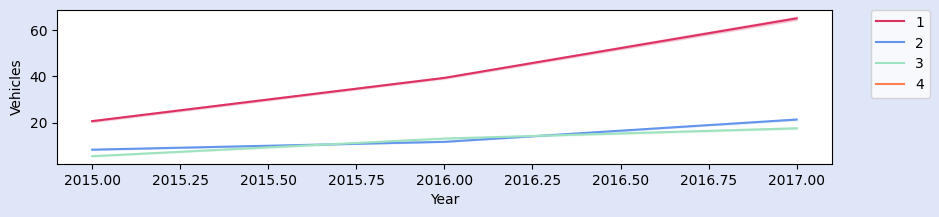

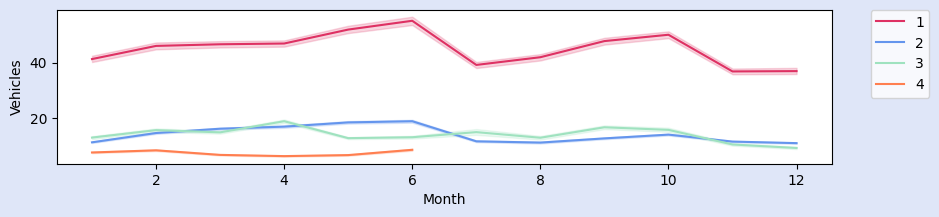

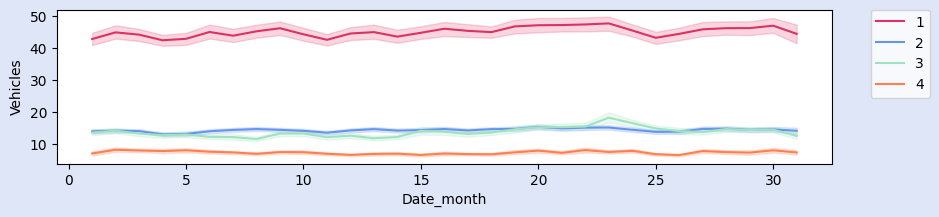

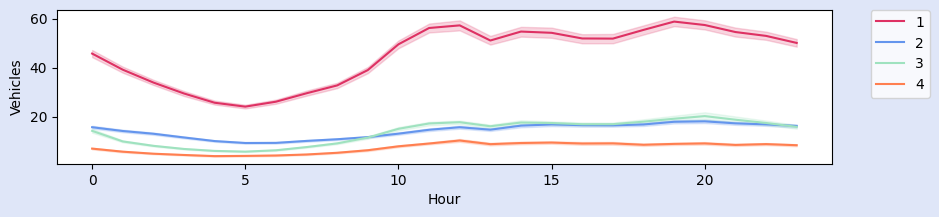

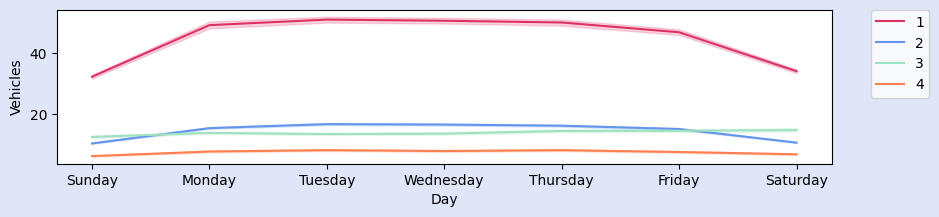

In [ ]:
#We'll plot timeseries for each newly created features
new_feat=["Year","Month","Date_month","Hour","Day"]
for i in new_feat:
    plt.figure(figsize=(10,2), facecolor="#DFE6F8")
    ax=sns.lineplot(x=df[i], y="Vehicles", data=df, hue="Junction", palette=colors)
    plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)

In [ ]:
"""
Here, from the above plots we observe:
- Yearly there is an upward trend, Junction 4 has sparse data as it
starts from 2017 and doesnt span over a year.

- Monthly Junction 1 and 2 have a drop during the month of June. This may
be due to vacation breaks. The same is seen in Junction 1 during October
due to festivites

- Date wise is consistent for all Junctions

- Day wise we can see there is a consistent traffic flow during the weekdays
(Monday to Friday). During the weekends the traffic flow is reduced as lesser
vehicles on roads.

-Hourly there is a significant amount of decrease in traffic during early
morning hours (12 am to 5 am), and then increases till evening hours.
"""

'\nHere, from the above plots we observe:\n- Yearly there is an upward trend, Junction 4 has sparse data as it\nstarts from 2017 and doesnt span over a year.\n\n- Monthly Junction 1 and 2 have a drop during the month of June. This may\nbe due to vacation breaks. The same is seen in Junction 1 during October\ndue to festivites\n\n- Date wise is consistent for all Junctions\n\n- Day wise we can see there is a consistent traffic flow during the weekdays\n(Monday to Friday). During the weekends the traffic flow is reduced as lesser\nvehicles on roads.\n\n-Hourly there is a significant amount of decrease in traffic during early\nmorning hours (12 am to 5 am), and then increases till evening hours.\n'

Text(0.5, 0, 'Date')

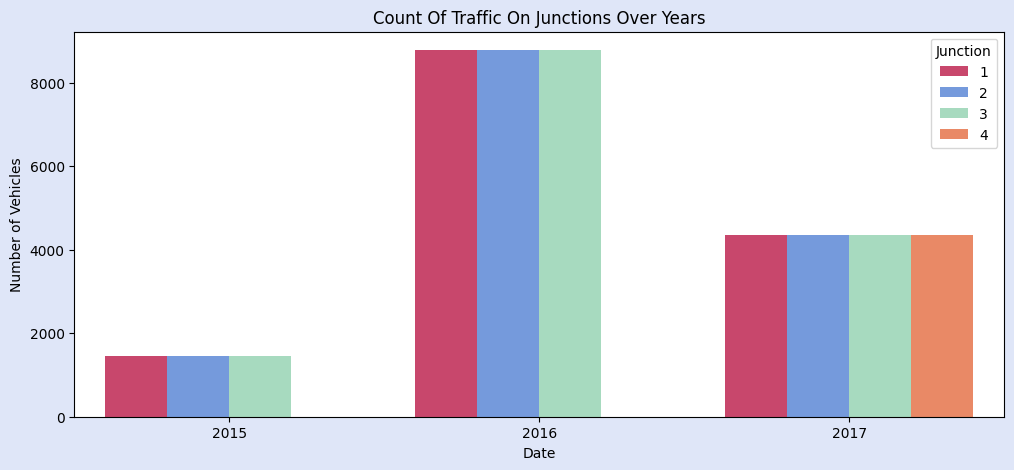

In [ ]:
#Let us now plot a count graph
plt.figure(figsize=(12,5), facecolor="#DFE6F8")
count= sns.countplot(data=df, x=df["Year"], hue="Junction", palette=colors)
count.set_title("Count Of Traffic On Junctions Over Years")
count.set_ylabel("Number of Vehicles")
count.set_xlabel("Date")

In [ ]:
"""
Here, there is a significant increase in the number of Vehicles between
2015 to 2016. However not much data is given about 2017 as data is given
only till June.

"""

'\nHere, there is a significant increase in the number of Vehicles between\n2015 to 2016. However not much data is given about 2017 as data is given\nonly till June.\n\n'

In [ ]:
"""
Now, the conclusions that I draw from the overall EDA:
-The yearly trend of Junction 1, 2 and 3 have different slopes
-Junction 1 has more number of vehicles in all seasonalities
-Sparse data is given for Junction 4
-Each Junction data is different from each other.

From inferences drawn by EDA, we can transform the data accordingly.

"""

'\nNow, the conclusions that I draw from the overall EDA:\n-The yearly trend of Junction 1, 2 and 3 have different slopes\n-Junction 1 has more number of vehicles in all seasonalities\n-Sparse data is given for Junction 4\n-Each Junction data is different from each other.\n\nFrom inferences drawn by EDA, we can transform the data accordingly.\n\n'

In [ ]:
#DATA TRANSFORMATION AND PREPROCESSING

In [ ]:
'''
In this we will perform data transformation to check if timeseries is
stationary or not.

To make the timeseries stationary we perfom two data transformations:
-Normalization
-Differentiation

To check if it is stationary or not we perform the Augmented Dickey-Fuller
Test.

We do these processes so that it'll be easy to feed data in the model for
accurate predictions and also for easy analysis of data
'''

"\nIn this we will perform data transformation to check if timeseries is\nstationary or not.\n\nTo make the timeseries stationary we perfom two data transformations:\n-Normalization\n-Differentiation\n\nTo check if it is stationary or not we perform the Augmented Dickey-Fuller\nTest.\n\nWe do these processes so that it'll be easy to feed data in the model for\naccurate predictions and also for easy analysis of data\n"

In [ ]:
#1. creating different dataframes of each junction and plotting them(before transformation)

In [ ]:
#to do this we can first pivot the data from junction
df_j=data.pivot(columns="Junction", index="DateTime")
df_j=df_j.drop(["ID"], axis=1)

In [ ]:
df_j.head()

Vehicles              
Junction                   1    2    3   4
DateTime                                  
2015-11-01 00:00:00     15.0  6.0  9.0 NaN
2015-11-01 01:00:00     13.0  6.0  7.0 NaN
2015-11-01 02:00:00     10.0  5.0  5.0 NaN
2015-11-01 03:00:00      7.0  6.0  1.0 NaN
2015-11-01 04:00:00      9.0  7.0  2.0 NaN

In [ ]:
df_j.describe()

Vehicles                                         
Junction             1             2             3            4
count     14592.000000  14592.000000  14592.000000  4344.000000
mean         45.052906     14.253221     13.694010     7.251611
std          23.008345      7.401307     10.436005     3.521455
min           5.000000      1.000000      1.000000     1.000000
25%          27.000000      9.000000      7.000000     5.000000
50%          40.000000     13.000000     11.000000     7.000000
75%          59.000000     17.000000     18.000000     9.000000
max         156.000000     48.000000    180.000000    36.000000

In [ ]:
#now we'll create some new sets to plot each junction
df_1=df_j[[('Vehicles', 1)]]
df_2=df_j[[('Vehicles', 2)]]
df_3=df_j[[('Vehicles', 3)]]
df_4=df_j[[('Vehicles', 4)]]
df_4=df_4.dropna() #remove the NaN values

In [ ]:
lists_df=[df_1, df_2, df_3, df_4]
for i in lists_df:
    i.columns=i.columns.droplevel(level=1)

In [ ]:
df_1.head()

,Vehicles
DateTime,
2015-11-01 00:00:00,15.0
2015-11-01 01:00:00,13.0
2015-11-01 02:00:00,10.0
2015-11-01 03:00:00,7.0
2015-11-01 04:00:00,9.0


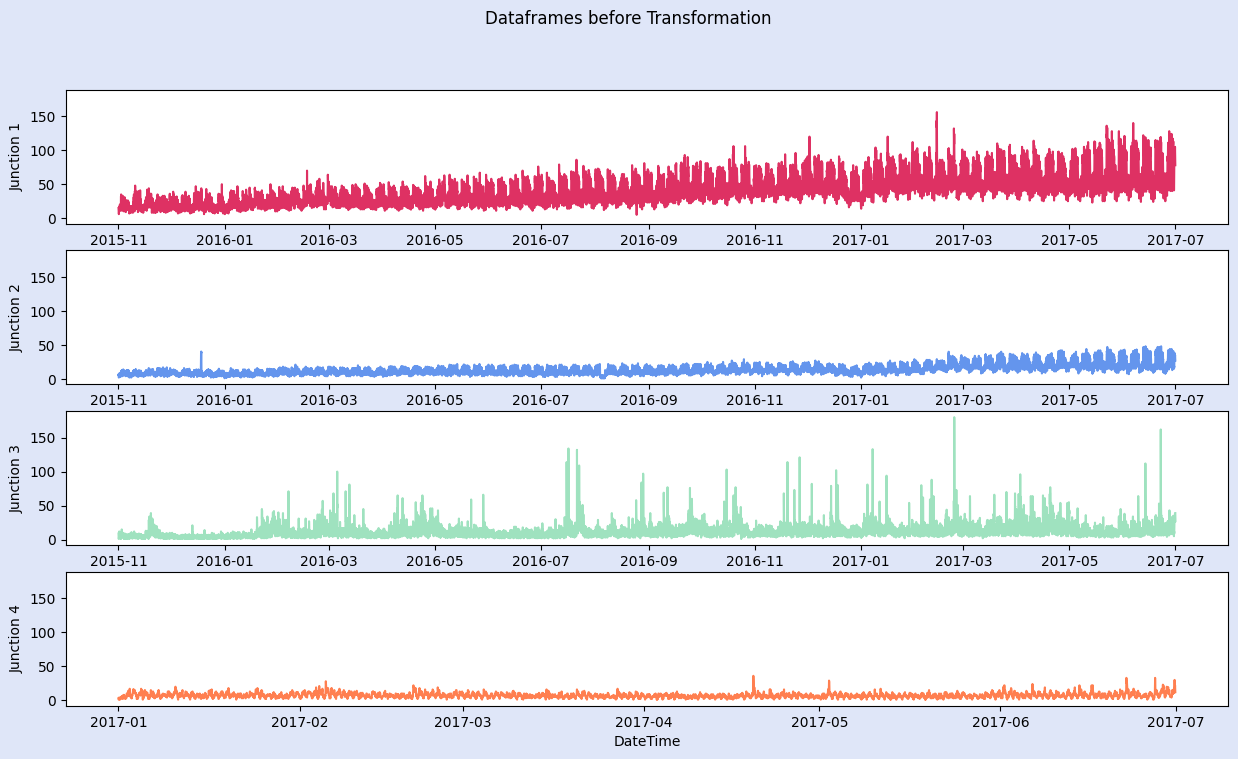

In [ ]:
#let us now plot each junction before transformation
def Sub_Plots4(df_1, df_2, df_3, df_4, title):
    fig, axes = plt.subplots(4, 1, figsize=(15,8), facecolor="#DFE6F8", sharey=True)
    fig.suptitle(title)
    pl_1=sns.lineplot(ax=axes[0], data=df_1, color=colors[0])
    axes[0].set(ylabel="Junction 1")
    pl_2=sns.lineplot(ax=axes[1], data=df_2, color=colors[1])
    axes[1].set(ylabel="Junction 2")
    pl_3=sns.lineplot(ax=axes[2], data=df_3, color=colors[2])
    axes[2].set(ylabel="Junction 3")
    pl_4=sns.lineplot(ax=axes[3], data=df_4, color=colors[3])
    axes[3].set(ylabel="Junction 4")

Sub_Plots4(df_1.Vehicles, df_2.Vehicles, df_3.Vehicles, df_4.Vehicles, "Dataframes before Transformation")

In [ ]:
'''
From the above, we see upward seasonalities and trends in Junction 1 and 2.
We also infered weekly and monthly seasonalities and trends from EDA.
So for timeseries to be stationary there shouldnt be any seasonalities and trends.
To make it stationary we perform transformation.
'''

'\nFrom the above, we see upward seasonalities and trends in Junction 1 and 2.\nWe also infered weekly and monthly seasonalities and trends from EDA.\nSo for timeseries to be stationary there shouldnt be any seasonalities and trends.\nTo make it stationary we perform transformation.\n'

In [ ]:
#for transformation we perform two steps: -Normalization and -Differentiation to remove the seasonalities

In [ ]:
#normalization fn (to bring features to a standardized scale)
def Normalize(df,col):
    average=df[col].mean()
    stdev=df[col].std()
    df_normalized=(df[col]-average)/stdev    #Z-Score (Standardization)
    df_normalized=df_normalized.to_frame()
    return df_normalized, average, stdev


In [ ]:
#differencing fn
def Difference(df,col,interval):
    diff=[]
    for i in range(interval, len(df)):
        value=df[col][i]-df[col][i-interval]
        diff.append(value)
    return diff


In [ ]:
'''
For removing the seasonality we'll perform differencing on each
junction with respect to the suitable feature

'''

"\nFor removing the seasonality we'll perform differencing on each\njunction with respect to the suitable feature\n\n"

In [ ]:
# Outlier removal function using the IQR method
def Remove_Outliers(df, col, threshold=1.5):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define lower and upper bounds
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR

    # Cap values beyond these bounds at the threshold
    df[col] = np.where(df[col] < lower_bound, lower_bound,
                       np.where(df[col] > upper_bound, upper_bound, df[col]))
    return df

In [ ]:
'''#for Junction 1 we take difference of weekly values
df_n1, av_j1, std_j1 = Normalize(df_1, "Vehicles")
Diff_1 = Difference(df_n1, col="Vehicles", interval=(24*7))
df_n1=df_n1[24*7:]
df_n1.columns=["Norm"]
df_n1["Diff"]=Diff_1

#for Junction 2 we take difference of dates
df_n2, av_j2, std_j2 = Normalize(df_2, "Vehicles")
Diff_2 = Difference(df_n2, col="Vehicles", interval=(24))
df_n2=df_n2[24:]
df_n2.columns=["Norm"]
df_n2["Diff"]=Diff_2

#for Junction 3 we take difference of hours
df_n3, av_j3, std_j3 = Normalize(df_3, "Vehicles")
Diff_3 = Difference(df_n3, col="Vehicles", interval=1)
df_n3=df_n3[1:]
df_n3.columns=["Norm"]
df_n3["Diff"]=Diff_3

#same for Junction 4
df_n4, av_j4, std_j4 = Normalize(df_4, "Vehicles")
Diff_4 = Difference(df_n4, col="Vehicles", interval=1)
df_n4=df_n4[1:]
df_n4.columns=["Norm"]
df_n4["Diff"]=Diff_4'''


'#for Junction 1 we take difference of weekly values\ndf_n1, av_j1, std_j1 = Normalize(df_1, "Vehicles")\nDiff_1 = Difference(df_n1, col="Vehicles", interval=(24*7))\ndf_n1=df_n1[24*7:]\ndf_n1.columns=["Norm"]\ndf_n1["Diff"]=Diff_1\n\n#for Junction 2 we take difference of dates\ndf_n2, av_j2, std_j2 = Normalize(df_2, "Vehicles")\nDiff_2 = Difference(df_n2, col="Vehicles", interval=(24))\ndf_n2=df_n2[24:]\ndf_n2.columns=["Norm"]\ndf_n2["Diff"]=Diff_2\n\n#for Junction 3 we take difference of hours\ndf_n3, av_j3, std_j3 = Normalize(df_3, "Vehicles")\nDiff_3 = Difference(df_n3, col="Vehicles", interval=1)\ndf_n3=df_n3[1:]\ndf_n3.columns=["Norm"]\ndf_n3["Diff"]=Diff_3\n\n#same for Junction 4\ndf_n4, av_j4, std_j4 = Normalize(df_4, "Vehicles")\nDiff_4 = Difference(df_n4, col="Vehicles", interval=1)\ndf_n4=df_n4[1:]\ndf_n4.columns=["Norm"]\ndf_n4["Diff"]=Diff_4'

In [ ]:
# Junction 1 (Weekly Differencing)
df_n1, av_j1, std_j1 = Normalize(df_1, "Vehicles")
Diff_1 = Difference(df_n1, col="Vehicles", interval=(24 * 7))
df_n1 = df_n1[24*7:]
df_n1.columns = ["Norm"]
df_n1["Diff"] = Diff_1
df_n1 = Remove_Outliers(df_n1, "Diff")  # Outlier handling

# Junction 2 (Daily Differencing)
df_n2, av_j2, std_j2 = Normalize(df_2, "Vehicles")
Diff_2 = Difference(df_n2, col="Vehicles", interval=24)
df_n2 = df_n2[24:]
df_n2.columns = ["Norm"]
df_n2["Diff"] = Diff_2
df_n2 = Remove_Outliers(df_n2, "Diff")

# Junction 3 (Hourly Differencing)
df_n3, av_j3, std_j3 = Normalize(df_3, "Vehicles")
Diff_3 = Difference(df_n3, col="Vehicles", interval=1)
df_n3 = df_n3[1:]
df_n3.columns = ["Norm"]
df_n3["Diff"] = Diff_3
df_n3 = Remove_Outliers(df_n3, "Diff")

# Junction 4 (Hourly Differencing)
df_n4, av_j4, std_j4 = Normalize(df_4, "Vehicles")
Diff_4 = Difference(df_n4, col="Vehicles", interval=1)
df_n4 = df_n4[1:]
df_n4.columns = ["Norm"]
df_n4["Diff"] = Diff_4
df_n4 = Remove_Outliers(df_n4, "Diff")

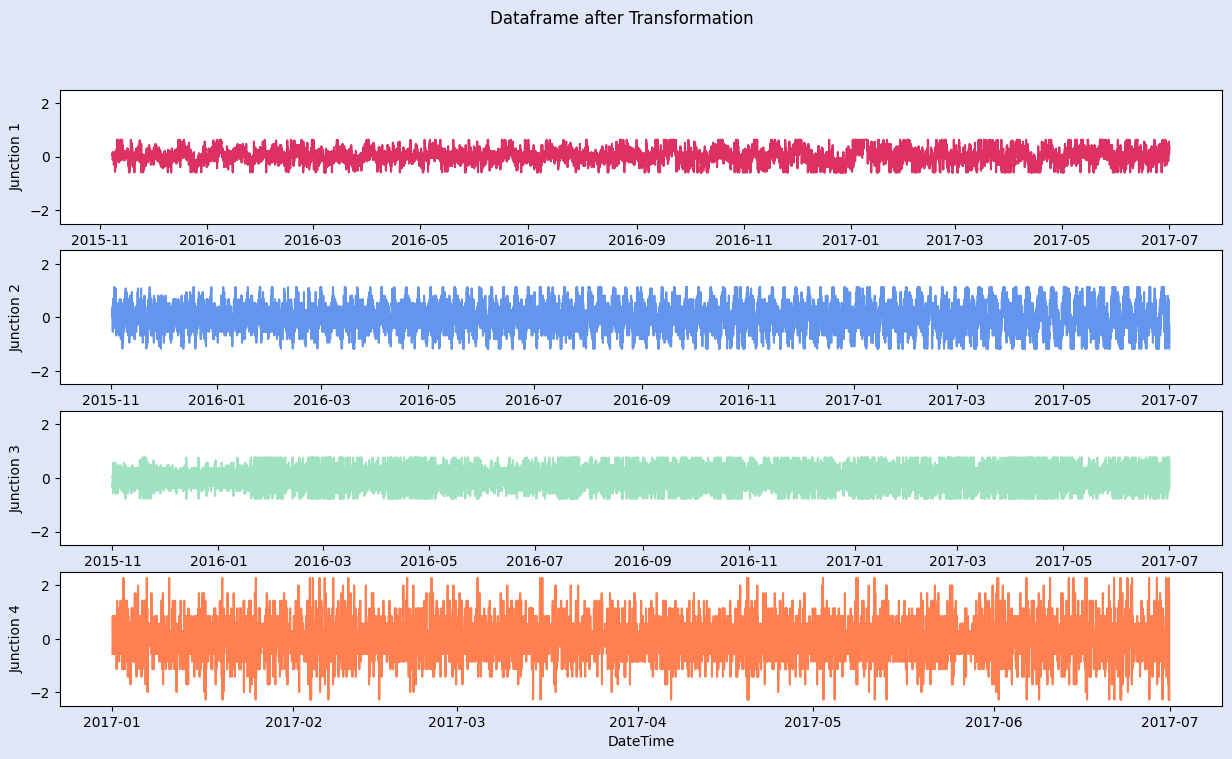

In [ ]:
# now plotting the transformed data
Sub_Plots4(df_n1.Diff, df_n2.Diff, df_n3.Diff, df_n4.Diff, "Dataframe after Transformation" )

In [ ]:
'''
The above plots look linear. Now to test if they're stationary we'll
perform Augmented Dickey-Fuller test.

'''

"\nThe above plots look linear. Now to test if they're stationary we'll\nperform Augmented Dickey-Fuller test.\n\n"

In [ ]:
def Stationary_check(df):
    check = adfuller(df.dropna())
    print(f"ADF Statistic: {check[0]}")
    print(f"p-value: {check[1]}")
    print("Critical values:")
    for key, value in check[4].items():
        print('\t%s: %.3f' % (key, value))
    if check[0] > check[4]["1%"]:
        print("Time series is non-stationary")
    else:
        print("Time series is stationary")


List_df_ND= [df_n1["Diff"], df_n2["Diff"], df_n3["Diff"], df_n4["Diff"]]
print("Checking the transformed series for stationarity:")
for i in List_df_ND:
    print("\n")
    Stationary_check(i)



Checking the transformed series for stationarity:


ADF Statistic: -15.265303390415434
p-value: 4.798539876396819e-28
Critical values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Time series is stationary


ADF Statistic: -21.795891026940144
p-value: 0.0
Critical values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Time series is stationary


ADF Statistic: -28.001759908832977
p-value: 0.0
Critical values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Time series is stationary


ADF Statistic: -17.979092563052305
p-value: 2.7787875325953405e-30
Critical values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
Time series is stationary


In [ ]:
'''
Using Augmented Dickey-Fuller test we see that the time series of the
transformed data is Stationary
'''

'\nUsing Augmented Dickey-Fuller test we see that the time series of the\ntransformed data is Stationary\n'

In [ ]:
#SPLITTING OF THE DATASET

In [ ]:
'''
Now that we have performed transformation resulting in stationary,
we can split our data into training and testing.

The training part will be fed into the model so that it understands and
analyzes the data. This model is then tested on the testing part of the data
to make predictions. We then compare the predicted and the actual outcomes
to denote the accuracy

'''

'\nNow that we have performed transformation resulting in stationary,\nwe can split our data into training and testing. \n\nThe training part will be fed into the model so that it understands and \nanalyzes the data. This model is then tested on the testing part of the data\nto make predictions. We then compare the predicted and the actual outcomes\nto denote the accuracy \n\n'

In [ ]:
#removing the NaN values
df_j1=df_n1["Diff"].dropna()
df_j1=df_j1.to_frame()

df_j2=df_n2["Diff"].dropna()
df_j2=df_j2.to_frame()

df_j3=df_n3["Diff"].dropna()
df_j3=df_j3.to_frame()

df_j4=df_n4["Diff"].dropna()
df_j4=df_j4.to_frame()

In [ ]:
#splitting the dataset
def Split_data(df):
    training_size=int(len(df)*0.90)
    data_len=len(df)
    train, test = df[0:training_size], df[training_size:data_len]
    train, test = train.values.reshape(-1, 1), test.values.reshape(-1, 1)
    return train, test

j1_train, j1_test = Split_data(df_j1)
j2_train, j2_test = Split_data(df_j2)
j3_train, j3_test = Split_data(df_j3)
j4_train, j4_test = Split_data(df_j4)

In [ ]:
# we'll now assign x as features and y as target
def TnF(df):
    end_len=len(df)
    X=[]
    Y=[]
    steps=32
    for i in range(steps, end_len):
        X.append(df[i-steps:i, 0])
        Y.append(df[i,0])
    X, Y = np.array(X), np.array(Y)
    return X, Y

def FeatureFixShape(train, test):
    train=np.reshape(train, (train.shape[0], train.shape[1], 1))
    test=np.reshape(test, (test.shape[0], test.shape[1], 1))
    return train, test

X_trainj1, Y_trainj1 = TnF(j1_train)
X_testj1, Y_testj1 = TnF(j1_test)
X_trainj1, X_testj1 = FeatureFixShape(X_trainj1, X_testj1)

X_trainj2, Y_trainj2 = TnF(j2_train)
X_testj2, Y_testj2 = TnF(j2_test)
X_trainj2, X_testj2 = FeatureFixShape(X_trainj2, X_testj2)

X_trainj3, Y_trainj3 = TnF(j3_train)
X_testj3, Y_testj3 = TnF(j3_test)
X_trainj3, X_testj3 = FeatureFixShape(X_trainj3, X_testj3)

X_trainj4, Y_trainj4 = TnF(j4_train)
X_testj4, Y_testj4 = TnF(j4_test)
X_trainj4, X_testj4 = FeatureFixShape(X_trainj4, X_testj4)

In [ ]:
#CREATING THE MODEL

In [ ]:
%pip install keras-tuner


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.5 MB/s eta 0:00:00




**hyperparameter tuning**

In [ ]:
import numpy as np
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Dropout
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import math

# Define the model-building function for hyperparameter tuning
def build_GRU_model(hp):
    model = Sequential()

    # Tune the number of GRU units in the first layer
    model.add(GRU(units=hp.Int('units1', min_value=50, max_value=200, step=50),
                  return_sequences=True,
                  input_shape=(X_train.shape[1], 1),
                  activation='tanh'))
    model.add(Dropout(hp.Float('dropout1', min_value=0.1, max_value=0.5, step=0.1)))

    # Tune the number of GRU units in the second layer
    model.add(GRU(units=hp.Int('units2', min_value=50, max_value=200, step=50),
                  return_sequences=True,
                  activation='tanh'))
    model.add(Dropout(hp.Float('dropout2', min_value=0.1, max_value=0.5, step=0.1)))

    # Tune the number of GRU units in the third layer
    model.add(GRU(units=hp.Int('units3', min_value=50, max_value=150, step=50),
                  return_sequences=False,
                  activation='tanh'))
    model.add(Dropout(hp.Float('dropout3', min_value=0.1, max_value=0.5, step=0.1)))

    # Add output layer
    model.add(Dense(units=1))

    # Tune optimizer parameters
    optimizer = SGD(
        decay=hp.Float('decay', min_value=1e-8, max_value=1e-5, sampling='LOG'),
        momentum=hp.Float('momentum', min_value=0.5, max_value=0.9, step=0.1)
    )

    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Function to perform K-fold cross-validation
def cross_val_GRU_model(X, y, num_folds=5):
    kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

    fold_no = 1
    rmse_per_fold = []

    for train_idx, test_idx in kfold.split(X):
        X_train_fold, X_test_fold = X[train_idx], X[test_idx]
        y_train_fold, y_test_fold = y[train_idx], y[test_idx]

        # Reshape data to match the input shape of GRU model
        X_train_fold = X_train_fold.reshape(X_train_fold.shape[0], X_train_fold.shape[1], 1)
        X_test_fold = X_test_fold.reshape(X_test_fold.shape[0], X_test_fold.shape[1], 1)

        # Initialize the tuner
        tuner = kt.RandomSearch(
            build_GRU_model,
            objective='val_loss',
            max_trials=10, # number of hyperparameter configurations to try
            executions_per_trial=1,
            directory='tuner_dir',
            project_name='GRU_Traffic_Prediction'
        )

        # Search for the best hyperparameters
        tuner.search(X_train_fold, y_train_fold, epochs=50, validation_data=(X_test_fold, y_test_fold), batch_size=150)

        # Get the best model
        best_model = tuner.get_best_models(num_models=1)[0]

        # Evaluate the best model on the test fold
        pred = best_model.predict(X_test_fold)
        rmse = math.sqrt(mean_squared_error(y_test_fold, pred))
        rmse_per_fold.append(rmse)

        print(f"Fold {fold_no} - RMSE: {rmse}")
        fold_no += 1

    # Return the average RMSE across all folds
    avg_rmse = np.mean(rmse_per_fold)
    print(f"Average RMSE across all folds: {avg_rmse}")
    return avg_rmse



# Perform cross-validation
cross_val_GRU_model(X_trainj1, Y_trainj1)


Trial 10 Complete [00h 33m 39s]
val_loss: 0.044660042971372604

Best val_loss So Far: 0.040786512196063995
Total elapsed time: 04h 49m 02s
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step
Fold 1 - RMSE: 0.20195672164505865
Reloading Tuner from tuner_dir/GRU_Traffic_Prediction/tuner0.json
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step
Fold 2 - RMSE: 0.20771816908100804
Reloading Tuner from tuner_dir/GRU_Traffic_Prediction/tuner0.json
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step
Fold 3 - RMSE: 0.21245361031586718
Reloading Tuner from tuner_dir/GRU_Traffic_Prediction/tuner0.json
81/81 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step
Fold 4 - RMSE: 0.22362534700028716
Reloading Tuner from tuner_dir/GRU_Traffic_Prediction/tuner0.json
81/81 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step
Fold 5 - RMSE: 0.2064952139043179
Average RMSE across all folds: 0.21044981238930777


0.21044981238930777

In [ ]:
import keras_tuner as kt

# Reload the tuner from the previous tuning directory
tuner = kt.RandomSearch(
    build_GRU_model,  # Your model-building function
    objective='val_loss',
    max_trials=10,  # Same as before (you don't need to change this)
    directory='tuner_dir',  # Same directory as before
    project_name='GRU_Traffic_Prediction'
)

# Reload the results of the previous search (if it was already completed)
tuner.reload()

# Get the best hyperparameters found during tuning
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]

# Print the best hyperparameters
print("Best Hyperparameters:")
for param in best_hyperparameters.values.items():
    print(param)


Reloading Tuner from tuner_dir/GRU_Traffic_Prediction/tuner0.json
Best Hyperparameters:
('units1', 200)
('dropout1', 0.30000000000000004)
('units2', 100)
('dropout2', 0.30000000000000004)
('units3', 100)
('dropout3', 0.5)
('decay', 1.9581888187531837e-08)
('momentum', 0.9)


In [ ]:
'''
The model that we'll use is GRU (Gated Recurrent Unit). This model is a type of RNN (recurrent nn)
is it widely used for processing sequential data like timeseries.
It is good at understanding patterns in timeseries, which is useful in
tasks like predicting traffic congestion over time. Thus this model is
best for our project

'''

"\nThe model that we'll use is GRU (Gated Recurrent Unit). This model is a type of RNN (recurrent nn)\nis it widely used for processing sequential data like timeseries. \nIt is good at understanding patterns in timeseries, which is useful in \ntasks like predicting traffic congestion over time. Thus this model is \nbest for our project\n\n"

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dropout, Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import callbacks
import math
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Updated Model for Prediction with Best Hyperparameters
def GRU_model(X_Train, y_Train, X_Test):
    early_stopping = callbacks.EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)

    # The GRU model with the best hyperparameters
    model = Sequential()

    # Layer 1: GRU with 200 units and 0.3 dropout
    model.add(GRU(units=200, return_sequences=True, input_shape=(X_Train.shape[1], 1), activation='tanh'))
    model.add(Dropout(0.3))

    # Layer 2: GRU with 100 units and 0.3 dropout
    model.add(GRU(units=100, return_sequences=True, activation='tanh'))
    model.add(Dropout(0.3))

    # Layer 3: GRU with 100 units and 0.5 dropout
    model.add(GRU(units=100, return_sequences=False, activation='tanh'))
    model.add(Dropout(0.5))

    # Output Layer
    model.add(Dense(units=1))

    # Compiling the model with the best decay and momentum values
    optimizer = SGD(decay=1.9581888187531837e-08, momentum=0.9)
    model.compile(optimizer=optimizer, loss='mean_squared_error')

    # Fit the model
    model.fit(X_Train, y_Train, epochs=50, batch_size=150, callbacks=[early_stopping])

    # Predict using the model
    pred_GRU = model.predict(X_Test)

    return pred_GRU

# Function to calculate the Root Mean Squared Error
def RMSE_Value(test, predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print(f"The root mean squared error is {rmse}.")
    return rmse

# Function to plot the True vs Predicted values
def PredictionsPlot(test, predicted, m):
    plt.figure(figsize=(12, 5), facecolor="#DFE6F8")
    plt.plot(test, color='blue', label="True Value", alpha=0.5)
    plt.plot(predicted, color="#34495E", label="Predicted Values")
    plt.title("GRU Traffic Prediction Vs True values")
    plt.xlabel("DateTime")
    plt.ylabel("Number of Vehicles")
    plt.legend()
    plt.show()

In [ ]:
"""def GRU_model(X_Train, Y_Train, X_Test):
    early_stopping=callbacks.EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)

    model=Sequential()
    model.add(GRU(units=150, return_sequences=True, input_shape=(X_Train.shape[1],1), activation='tanh'))
    model.add(Dropout(0.2))
    model.add(GRU(units=150, return_sequences=True, input_shape=(X_Train.shape[1],1), activation='tanh'))
    model.add(Dropout(0.2))
    model.add(GRU(units=50, return_sequences=True, input_shape=(X_Train.shape[1],1), activation='tanh'))
    model.add(Dropout(0.2))
    model.add(GRU(units=50, return_sequences=True, input_shape=(X_Train.shape[1],1), activation='tanh'))
    model.add(Dropout(0.2))

    model.add(GRU(units=50, return_sequences=True, input_shape=(X_Train.shape[1],1), activation='tanh'))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))


    model.compile(optimizer=SGD(decay=1e-7, momentum=0.9), loss='mean_squared_error')
    model.fit(X_Train, Y_Train, epochs=50, batch_size=150, callbacks=[early_stopping])
    pred_GRU=model.predict(X_Test)
    return pred_GRU

#root mean square to calculate error
def RMSE_value(test, predicted):
    rmse=math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))
    return rmse

#plotting
def PredictionsPlot(test, predicted, m):
    plt.figure(figsize=(12,5), facecolor="#DFE6F8")
    plt.plot(test, color=colors[m], label="True Value", alpha=0.5)
    plt.plot(predicted, color="#34495E", label="Predicted Values")
    plt.title("GRU Traffic Prediction VS True Values")
    plt.xlabel("DateTime")
    plt.ylabel("Number of Vehicles")
    plt.legend()
    plt.show()"""

'def GRU_model(X_Train, Y_Train, X_Test):\n    early_stopping=callbacks.EarlyStopping(monitor=\'loss\', patience=10, restore_best_weights=True)\n    \n    model=Sequential()\n    model.add(GRU(units=150, return_sequences=True, input_shape=(X_Train.shape[1],1), activation=\'tanh\'))\n    model.add(Dropout(0.2))\n    model.add(GRU(units=150, return_sequences=True, input_shape=(X_Train.shape[1],1), activation=\'tanh\'))\n    model.add(Dropout(0.2))\n    model.add(GRU(units=50, return_sequences=True, input_shape=(X_Train.shape[1],1), activation=\'tanh\'))\n    model.add(Dropout(0.2))\n    model.add(GRU(units=50, return_sequences=True, input_shape=(X_Train.shape[1],1), activation=\'tanh\'))\n    model.add(Dropout(0.2))\n    \n    model.add(GRU(units=50, return_sequences=True, input_shape=(X_Train.shape[1],1), activation=\'tanh\'))\n    model.add(Dropout(0.2))\n    model.add(Dense(units=1))\n\n    \n    model.compile(optimizer=SGD(decay=1e-7, momentum=0.9), loss=\'mean_squared_error\')\n    

In [ ]:
#FITTING THE MODEL

In [ ]:
'''
Here, we will fit the predicted values created by the model to the
transformed dataset and compare them and see how accurate the predicted
values are.

'''

'\nHere, we will fit the predicted values created by the model to the\ntransformed dataset and compare them and see how accurate the predicted\nvalues are.\n\n'

In [ ]:
# Junction 1
Predj1=GRU_model(X_trainj1, Y_trainj1, X_testj1)

Epoch 1/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 42s 421ms/step - loss: 0.0557
Epoch 2/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 43s 452ms/step - loss: 0.0393
Epoch 3/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 38s 418ms/step - loss: 0.0388
Epoch 4/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 39s 448ms/step - loss: 0.0375
Epoch 5/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 39s 448ms/step - loss: 0.0373
Epoch 6/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 39s 424ms/step - loss: 0.0375
Epoch 7/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 38s 434ms/step - loss: 0.0365
Epoch 8/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 41s 444ms/step - loss: 0.0367
Epoch 9/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 41s 447ms/step - loss: 0.0365
Epoch 10/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 38s 434ms/step - loss: 0.0365
Epoch 11/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 45s 486ms/step - loss: 0.0358
Epoch 12/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 78s 435ms/step - loss: 0.0363
Epoch 13/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 42s 443ms/step - loss: 0.0369
Epoch 14/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 41s 441ms/step - loss: 0.0357
Epoch 15/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 41s 

The root mean squared error is 0.20213319445857533.


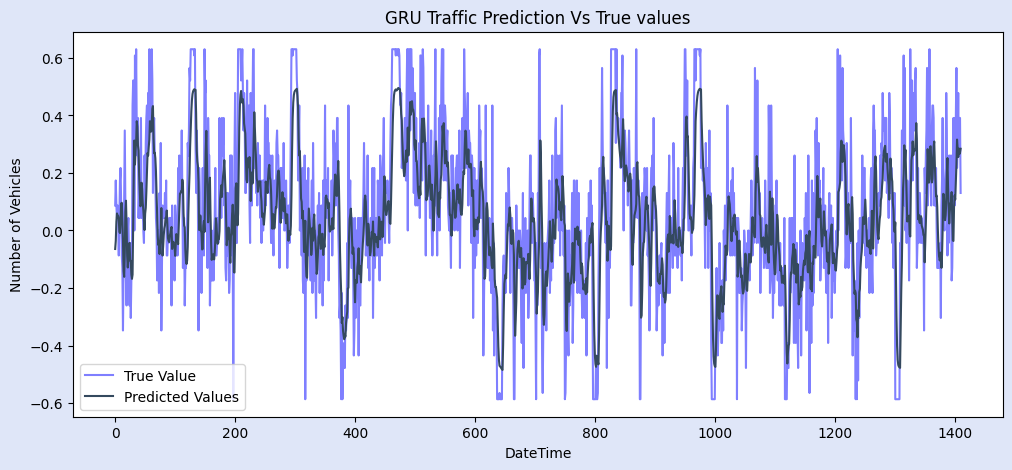

In [ ]:
RMSE_J1=RMSE_Value(Y_testj1, Predj1)
PredictionsPlot(Y_testj1, Predj1, 0)

In [ ]:
# Model for the prediction using LSTM
def LSTM_model(X_Train, y_Train, X_Test):
    early_stopping = callbacks.EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)
    # Callback delta 0.01 may interrupt the learning, could eliminate this step, but meh!

    # The LSTM model
    model = Sequential()

    # First LSTM layer with 200 units (based on the tuned hyperparameters)
    model.add(LSTM(units=200, return_sequences=True, input_shape=(X_Train.shape[1], 1), activation='tanh'))
    model.add(Dropout(0.3))  # Dropout of 0.3 to prevent overfitting

    # Second LSTM layer with 100 units
    model.add(LSTM(units=100, return_sequences=True, activation='tanh'))
    model.add(Dropout(0.3))  # Dropout of 0.3

    # Third LSTM layer with 100 units
    model.add(LSTM(units=100, return_sequences=False, activation='tanh'))
    model.add(Dropout(0.5))  # Dropout of 0.5

    # Dense output layer
    model.add(Dense(units=1))

    # Compiling the model
    model.compile(optimizer=SGD(decay=1.9581888187531837e-08, momentum=0.9), loss='mean_squared_error')

    # Fitting the model
    model.fit(X_Train, y_Train, epochs=50, batch_size=150, callbacks=[early_stopping])

    # Prediction using the trained model
    pred_LSTM = model.predict(X_Test)

    return pred_LSTM

# To calculate the root mean squared error (RMSE) in predictions
def RMSE_Value(test, predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))
    return rmse

# To plot the comparative plot of true values and predictions
def PredictionsPlot(test, predicted, m):
    plt.figure(figsize=(12,5), facecolor="#DFE6F8")
    plt.plot(test, color=colors[m], label="True Value", alpha=0.5)
    plt.plot(predicted, color="#34495E", label="Predicted Values")
    plt.title("LSTM Traffic Prediction Vs True values")
    plt.xlabel("DateTime")
    plt.ylabel("Number of Vehicles")
    plt.legend()
    plt.show()


In [ ]:
Predj11=LSTM_model(X_trainj1, Y_trainj1, X_testj1)

Epoch 1/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 35s 342ms/step - loss: 0.0887
Epoch 2/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 41s 339ms/step - loss: 0.0718
Epoch 3/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 41s 341ms/step - loss: 0.0723
Epoch 4/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 41s 343ms/step - loss: 0.0680
Epoch 5/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 41s 340ms/step - loss: 0.0702
Epoch 6/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 41s 343ms/step - loss: 0.0668
Epoch 7/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 42s 351ms/step - loss: 0.0691
Epoch 8/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 41s 351ms/step - loss: 0.0670
Epoch 9/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 42s 360ms/step - loss: 0.0624
Epoch 10/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 40s 348ms/step - loss: 0.0636
Epoch 11/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 42s 353ms/step - loss: 0.0616
Epoch 12/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 41s 354ms/step - loss: 0.0624
Epoch 13/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 41s 351ms/step - loss: 0.0630
Epoch 14/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 41s 355ms/step - loss: 0.0632
Epoch 15/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 30s 

The root mean squared error is 0.2504193305155612.


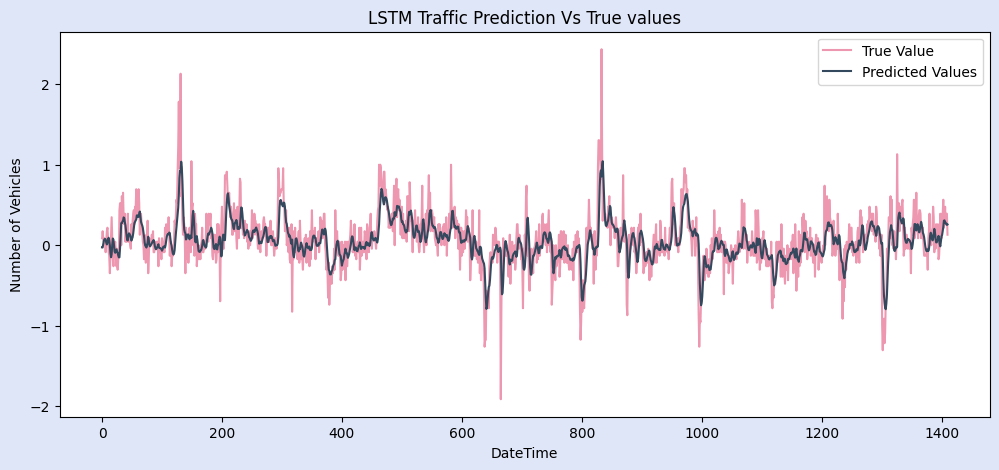

In [ ]:
RMSE_J11=RMSE_Value(Y_testj1, Predj11)
PredictionsPlot(Y_testj1, Predj11, 0)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import math

# Function for prediction using SVR
def SVR_model(X_Train, y_Train, X_Test):
    # Flatten the input data if it's 3D
    X_Train_flat = X_Train.reshape(X_Train.shape[0], -1)  # Flattening to 2D
    X_Test_flat = X_Test.reshape(X_Test.shape[0], -1)      # Flattening to 2D

    # Create an SVR model with RBF kernel
    model = SVR(kernel='rbf', C=100, gamma='scale')  # You can adjust C and gamma based on your needs

    # Fit the model
    model.fit(X_Train_flat, y_Train.ravel())  # Use ravel to ensure y_Train is 1D

    # Predict using the trained model
    pred_SVR = model.predict(X_Test_flat)

    return pred_SVR

# To calculate the root mean squared error (RMSE) in predictions
def RMSE_Value(test, predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))
    return rmse

# To plot the comparative plot of true values and predictions
def PredictionsPlot(test, predicted, m):
    plt.figure(figsize=(12, 5), facecolor="#DFE6F8")
    plt.plot(test, color=colors[m], label="True Value", alpha=0.5)
    plt.plot(predicted, color="#34495E", label="Predicted Values")
    plt.title("SVR Traffic Prediction Vs True values")
    plt.xlabel("DateTime")
    plt.ylabel("Number of Vehicles")
    plt.legend()
    plt.show()


In [ ]:
Predj111=SVR_model(X_trainj1, Y_trainj1, X_testj1)

The root mean squared error is 0.260213136158309.


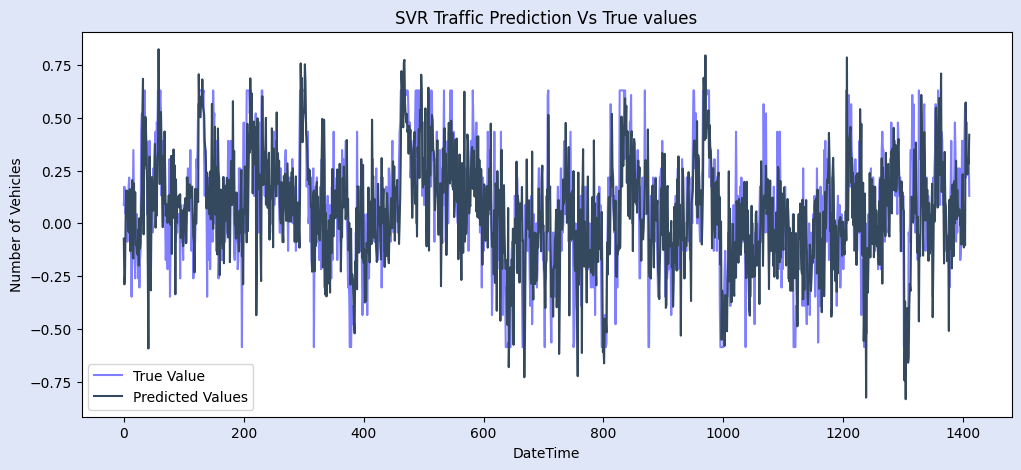

In [ ]:
RMSE_J111=RMSE_Value(Y_testj1, Predj111)
PredictionsPlot(Y_testj1, Predj111, 0)

In [ ]:
%pip install xgboost


Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
The root mean squared error is 0.19675205429529688.


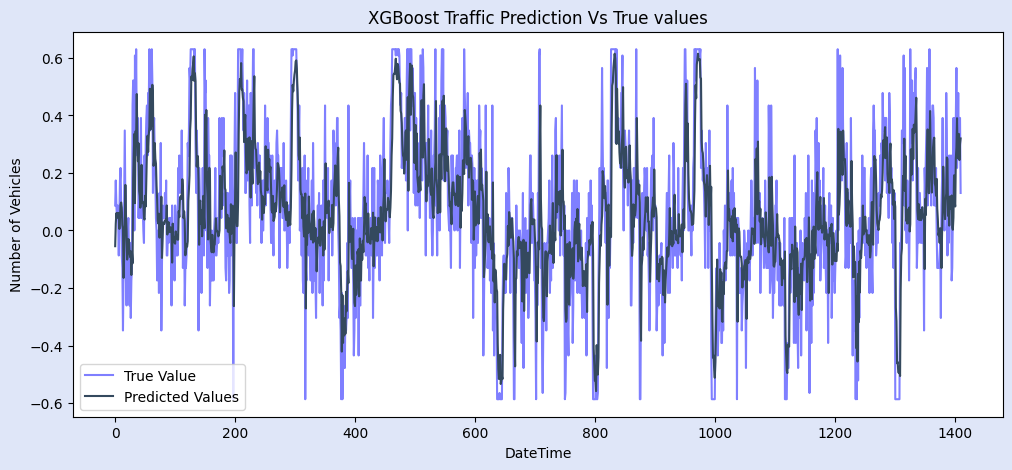

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
import math

# Function for prediction using XGBoost
def XGBoost_model(X_Train, y_Train, X_Test, param_grid=None):
    # Flatten the input data if it's 3D
    X_Train_flat = X_Train.reshape(X_Train.shape[0], -1)  # Flattening to 2D
    X_Test_flat = X_Test.reshape(X_Test.shape[0], -1)      # Flattening to 2D

    # Create an XGBoost regressor model
    model = XGBRegressor(objective='reg:squarederror')

    if param_grid:
        # Perform hyperparameter tuning using GridSearchCV
        grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                                   scoring='neg_mean_squared_error', cv=5, verbose=1)
        grid_search.fit(X_Train_flat, y_Train.ravel())  # Fit on flattened training data
        best_model = grid_search.best_estimator_  # Get the best model
        print(f"Best hyperparameters: {grid_search.best_params_}")
    else:
        # If no grid search is provided, fit the model with default parameters
        best_model = model.fit(X_Train_flat, y_Train.ravel())

    # Predict using the trained model
    pred_XGBoost = best_model.predict(X_Test_flat)

    return pred_XGBoost

# To calculate the root mean squared error (RMSE) in predictions
def RMSE_Value(test, predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))
    return rmse

# To plot the comparative plot of true values and predictions
def PredictionsPlot(test, predicted, m):
    plt.figure(figsize=(12, 5), facecolor="#DFE6F8")
    plt.plot(test, color=colors[m], label="True Value", alpha=0.5)
    plt.plot(predicted, color="#34495E", label="Predicted Values")
    plt.title("XGBoost Traffic Prediction Vs True values")
    plt.xlabel("DateTime")
    plt.ylabel("Number of Vehicles")
    plt.legend()
    plt.show()

# Example of parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.8, 1.0]
}

# Sample data split (replace with your actual data)
# X_Train, y_Train, X_Test should be defined in your context

# Run the XGBoost model with hyperparameter tuning
Predj1111 = XGBoost_model(X_trainj1, Y_trainj1, X_testj1, param_grid)

# Calculate RMSE
rmse = RMSE_Value(Y_testj1, Predj1111)

# Plot predictions
colors = ['blue', 'orange']  # Define colors for plotting
PredictionsPlot(Y_testj1, Predj1111, 0)


In [ ]:
Predj2=GRU_model(X_trainj2, Y_trainj2, X_testj2)

Epoch 1/50
88/88 [==============================] - 32s 209ms/step - loss: 0.2379
Epoch 2/50
88/88 [==============================] - 18s 208ms/step - loss: 0.2079
Epoch 3/50
88/88 [==============================] - 18s 209ms/step - loss: 0.1971
Epoch 4/50
88/88 [==============================] - 19s 213ms/step - loss: 0.1969
Epoch 5/50
88/88 [==============================] - 19s 210ms/step - loss: 0.1931
Epoch 6/50
88/88 [==============================] - 18s 207ms/step - loss: 0.1931
Epoch 7/50
88/88 [==============================] - 18s 206ms/step - loss: 0.1919
Epoch 8/50
88/88 [==============================] - 18s 210ms/step - loss: 0.1908
Epoch 9/50
88/88 [==============================] - 19s 211ms/step - loss: 0.1906
Epoch 10/50
88/88 [==============================] - 19s 211ms/step - loss: 0.1879
Epoch 11/50
88/88 [==============================] - 19s 213ms/step - loss: 0.1905
Epoch 12/50
88/88 [==============================] - 18s 206ms/step - loss: 0.1879
Epoch 13/50
8

The root mean squared error is 0.5571111074457457.


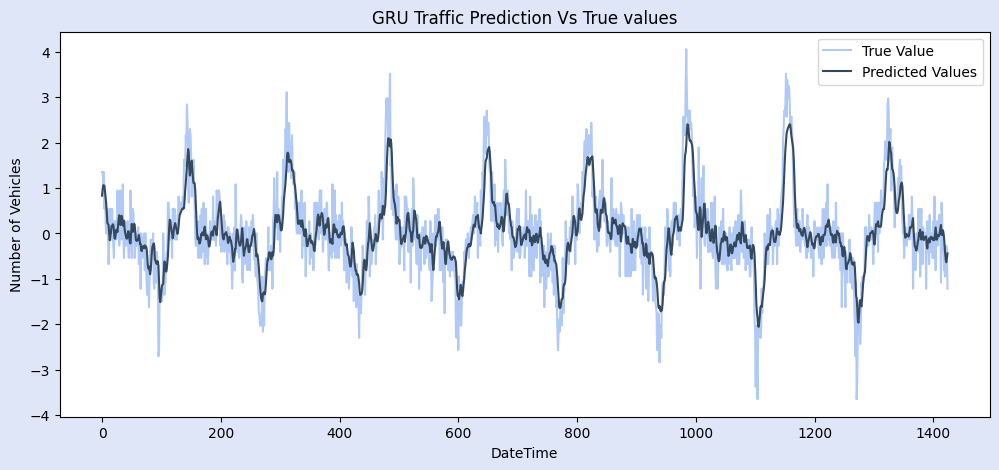

In [ ]:
RMSE_J2=RMSE_Value(Y_testj2, Predj2)
PredictionsPlot(Y_testj2, Predj2, 1)

In [ ]:
Predj3=GRU_model(X_trainj3, Y_trainj3, X_testj3)

Epoch 1/50
88/88 [==============================] - 29s 217ms/step - loss: 0.2987
Epoch 2/50
88/88 [==============================] - 19s 217ms/step - loss: 0.2923
Epoch 3/50
88/88 [==============================] - 19s 220ms/step - loss: 0.2891
Epoch 4/50
88/88 [==============================] - 20s 226ms/step - loss: 0.2879
Epoch 5/50
88/88 [==============================] - 20s 225ms/step - loss: 0.2900
Epoch 6/50
88/88 [==============================] - 20s 224ms/step - loss: 0.2886
Epoch 7/50
88/88 [==============================] - 19s 218ms/step - loss: 0.2880
Epoch 8/50
88/88 [==============================] - 20s 224ms/step - loss: 0.2890
Epoch 9/50
88/88 [==============================] - 20s 222ms/step - loss: 0.2896
Epoch 10/50
88/88 [==============================] - 20s 228ms/step - loss: 0.2845
Epoch 11/50
88/88 [==============================] - 20s 223ms/step - loss: 0.2852
Epoch 12/50
88/88 [==============================] - 20s 223ms/step - loss: 0.2837
Epoch 13/50
8

The root mean squared error is 0.6103791129619613.


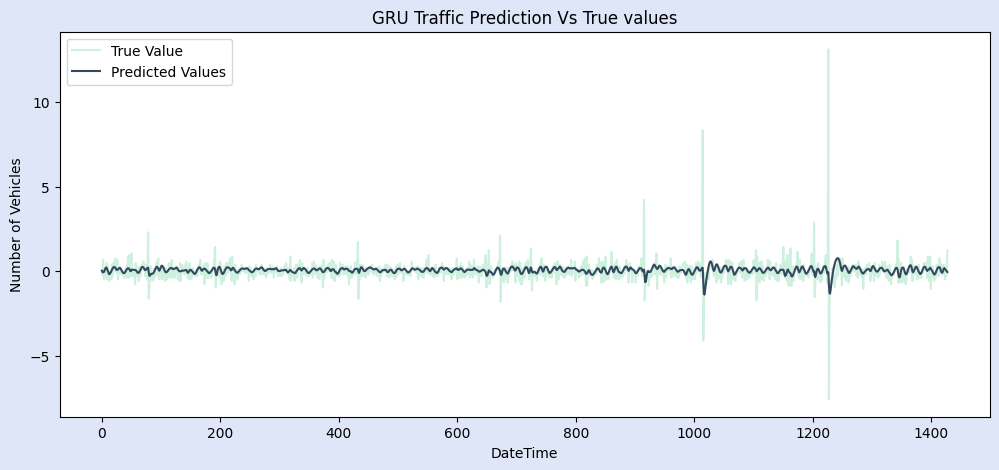

In [ ]:
RMSE_J3=RMSE_Value(Y_testj3, Predj3)
PredictionsPlot(Y_testj3, Predj3, 2)

In [ ]:
Predj4=GRU_model(X_trainj4, Y_trainj4, X_testj4)

Epoch 1/50
26/26 [==============================] - 18s 246ms/step - loss: 0.6908
Epoch 2/50
26/26 [==============================] - 7s 254ms/step - loss: 0.6910
Epoch 3/50
26/26 [==============================] - 7s 252ms/step - loss: 0.6882
Epoch 4/50
26/26 [==============================] - 7s 250ms/step - loss: 0.6857
Epoch 5/50
26/26 [==============================] - 7s 251ms/step - loss: 0.6894
Epoch 6/50
26/26 [==============================] - 7s 251ms/step - loss: 0.6831
Epoch 7/50
26/26 [==============================] - 6s 242ms/step - loss: 0.6825
Epoch 8/50
26/26 [==============================] - 7s 257ms/step - loss: 0.6843
Epoch 9/50
26/26 [==============================] - 7s 255ms/step - loss: 0.6780
Epoch 10/50
26/26 [==============================] - 7s 255ms/step - loss: 0.6806
Epoch 11/50
26/26 [==============================] - 6s 250ms/step - loss: 0.6842
Epoch 12/50
26/26 [==============================] - 7s 260ms/step - loss: 0.6785
Epoch 13/50
26/26 [=====

The root mean squared error is 1.0063558484486252.


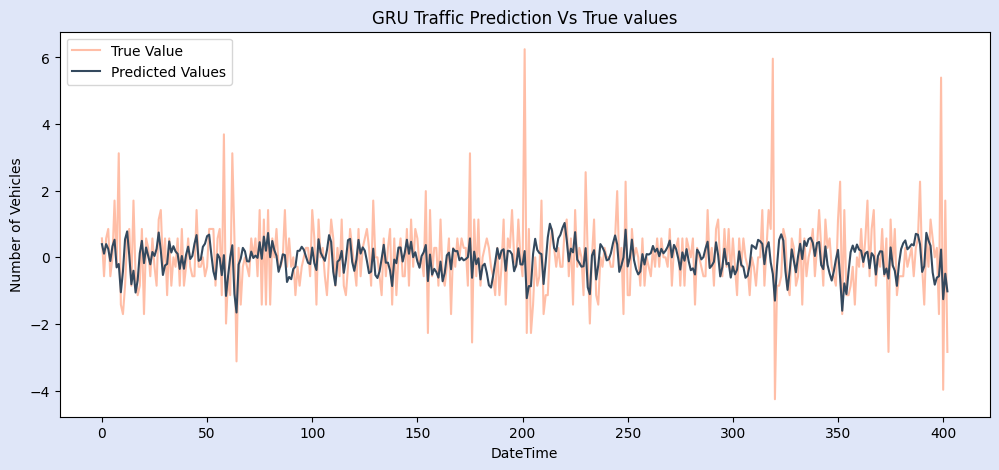

In [ ]:
RMSE_J4=RMSE_Value(Y_testj4, Predj4)
PredictionsPlot(Y_testj4, Predj4, 3)

In [ ]:
#Initialise data of lists for error values of four junctions.
Junctions = ["Junction1", "Junction2", "Junction3", "Junction4"]
RMSE = [RMSE_J1, RMSE_J2, RMSE_J3, RMSE_J4]
list_of_tuples = list(zip(Junctions, RMSE))
# Creates pandas DataFrame.
Results = pd.DataFrame(list_of_tuples, columns=["Junction", "RMSE"])
Results.style.background_gradient(cmap="Pastel1")

,Junction,RMSE
0,Junction1,0.246843
1,Junction2,0.557111
2,Junction3,0.610379
3,Junction4,1.006356


In [ ]:
#INVERSING THE MODEL

In [ ]:
'''
Here we are inversing the transformed model back to its original form. We can compare the predicted
and the original values. By this we can come up with the final inference.
'''

In [ ]:
# Functions to inverse transforms and Plot comparitive plots
# invert differenced forecast
def inverse_difference(last_ob, value):
    inversed = value + last_ob
    return inversed
#Plotting the comparison
def Sub_Plots2(df_1, df_2,title,m):
    fig, axes = plt.subplots(1, 2, figsize=(18,4), sharey=True,facecolor="#DFE6F8")
    fig.suptitle(title)

    pl_1=sns.lineplot(ax=axes[0],data=df_1,color=colors[m])
    axes[0].set(ylabel ="Prediction")

    pl_2=sns.lineplot(ax=axes[1],data=df_2["Vehicles"],color="#627D78")
    axes[1].set(ylabel ="Orignal")

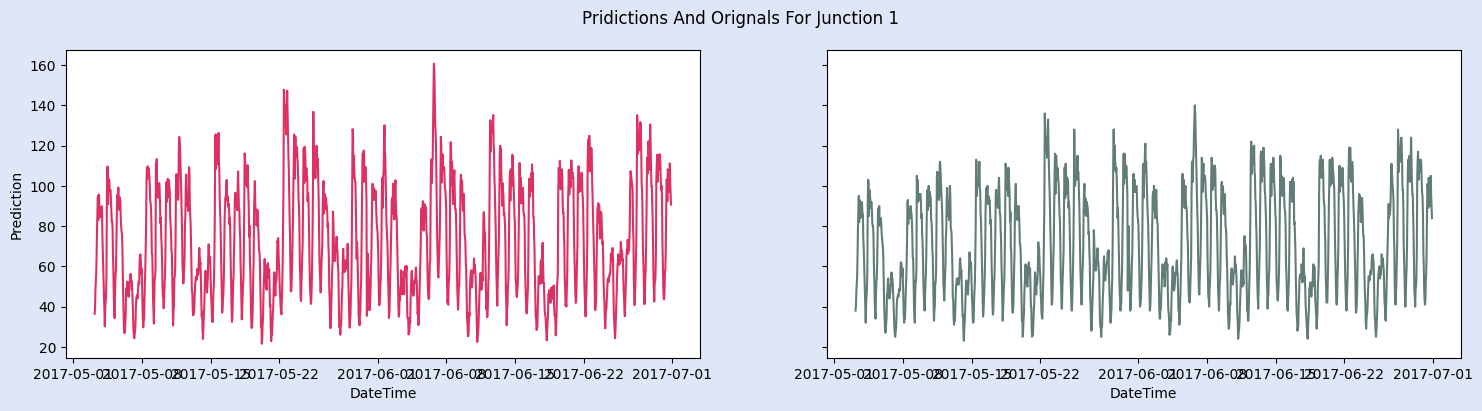

In [ ]:
# invert the differenced forecast for Junction 1
recover1 = df_n1.Norm[-1412:-1].to_frame()
recover1["Pred"]= Predj1
Transform_reverssed_J1 = inverse_difference(recover1.Norm, recover1.Pred).to_frame()
Transform_reverssed_J1.columns = ["Pred_Normed"]
#Invert the normalizeation J1
Final_J1_Pred = (Transform_reverssed_J1.values* std_j1) + av_j1
Transform_reverssed_J1["Pred_Final"] =Final_J1_Pred
#Plotting the Predictions with orignals
Sub_Plots2(Transform_reverssed_J1["Pred_Final"], df_1[-1412:-1],"Pridictions And Orignals For Junction 1", 0)

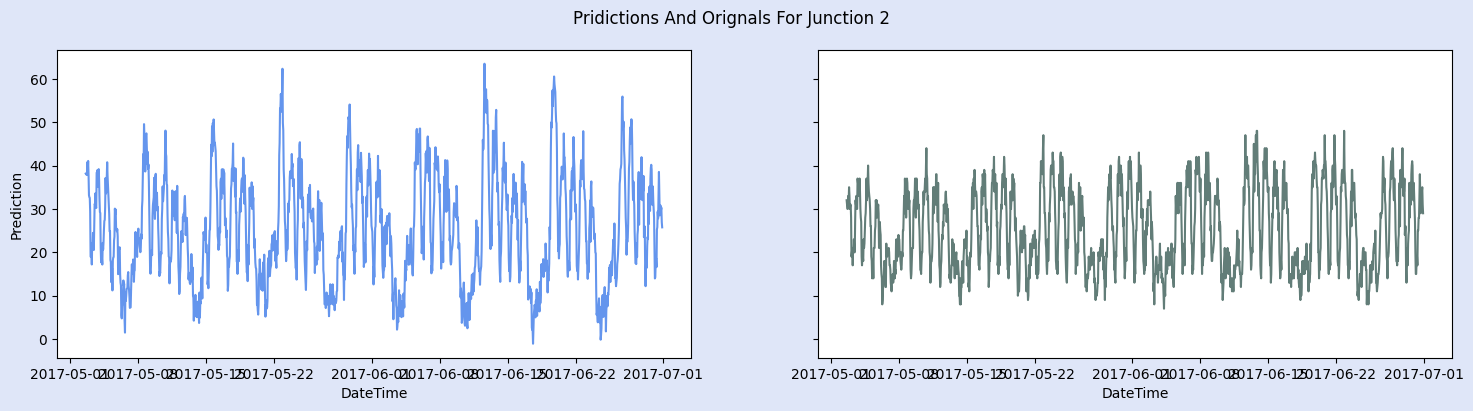

In [ ]:
#Invert the differenced J2
recover2 = df_n2.Norm[-1426:-1].to_frame() #len as per the diff
recover2["Pred"]= Predj2
Transform_reverssed_J2 = inverse_difference(recover2.Norm, recover2.Pred).to_frame()
Transform_reverssed_J2.columns = ["Pred_Normed"]
Final_J2_Pred = (Transform_reverssed_J2.values* std_j2) + av_j2
Transform_reverssed_J2["Pred_Final"] =Final_J2_Pred
#Plotting the Predictions with orignals
Sub_Plots2(Transform_reverssed_J2["Pred_Final"], df_2[-1426:-1],"Pridictions And Orignals For Junction 2", 1)

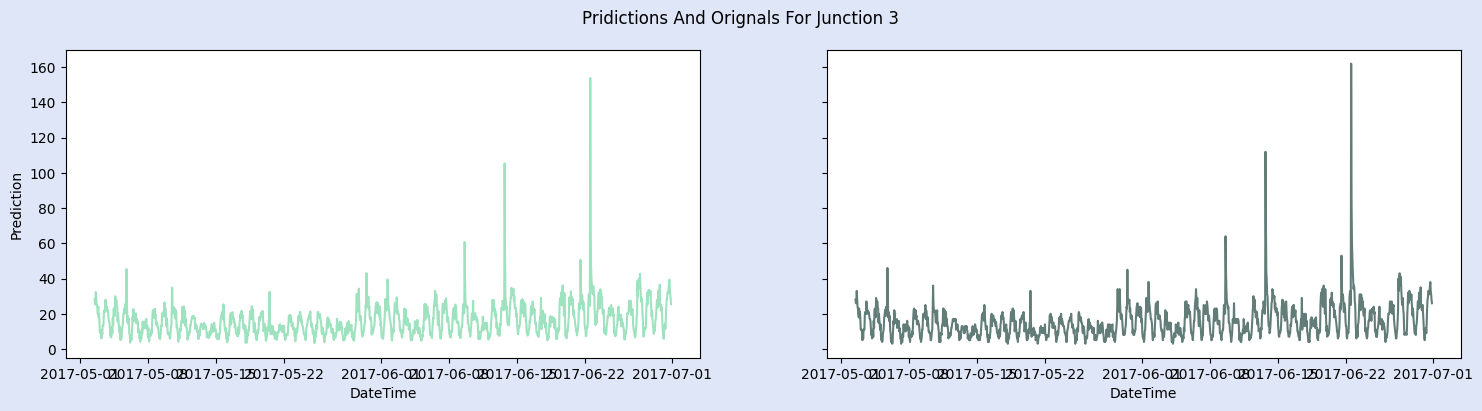

In [ ]:
#Invert the differenced J3
recover3 = df_n3.Norm[-1429:-1].to_frame() #len as per the diff
recover3["Pred"]= Predj3
Transform_reverssed_J3 = inverse_difference(recover3.Norm, recover3.Pred).to_frame()
Transform_reverssed_J3.columns = ["Pred_Normed"]
#Invert the normalizeation J3
Final_J3_Pred = (Transform_reverssed_J3.values* std_j3) + av_j3
Transform_reverssed_J3["Pred_Final"] =Final_J3_Pred
Sub_Plots2(Transform_reverssed_J3["Pred_Final"], df_3[-1429:-1],"Pridictions And Orignals For Junction 3", 2)

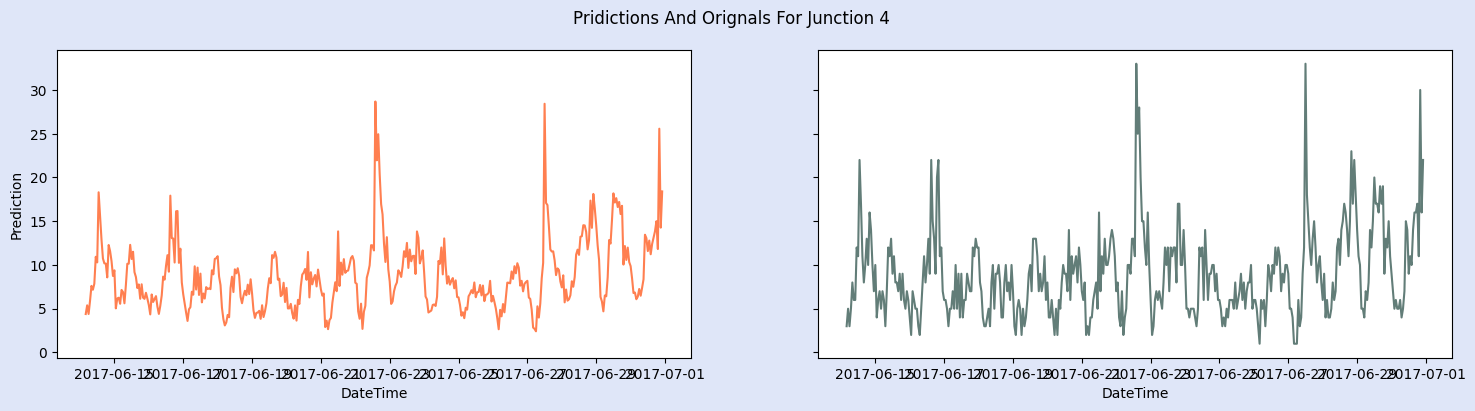

In [ ]:
#Invert the differenced J4
recover4 = df_n4.Norm[-404:-1].to_frame()  #len as per the testset
recover4["Pred"]= Predj4
Transform_reverssed_J4 = inverse_difference(recover4.Norm, recover4.Pred).to_frame()
Transform_reverssed_J4.columns = ["Pred_Normed"]
#Invert the normalizeation J4
Final_J4_Pred = (Transform_reverssed_J4.values* std_j4) + av_j4
Transform_reverssed_J4["Pred_Final"] =Final_J4_Pred
Sub_Plots2(Transform_reverssed_J4["Pred_Final"], df_4[-404:-1],"Pridictions And Orignals For Junction 4", 3)

In [ ]:
# FINDING THE SHORTEST PATH USING DIJKASTRAS ALGORITHM:

In [ ]:
'''Now we have finished analyzing the data, our second objective is to find the shortest route.
We have 4 junctions, each junction will be assigned with a congestion score. Highest score indicates more
traffic density. According to the scores we'll use Dijkstras's algorithm to find out the shortest distance between 4 junctions '''

In [ ]:
import pandas as pd


df['DateTime'] = pd.to_datetime(df['DateTime'])
df['Hour'] = df['DateTime'].dt.hour  # Extract hour for time-based aggregation

# Perform Step 1 for each junction
average_vehicle_counts = {}
for junction in df['Junction'].unique():
    junction_data = df[df['Junction'] == junction]
    average_vehicle_counts[junction] = junction_data.groupby('Hour')['Vehicles'].mean().reset_index()

# Now, average_vehicle_counts is a dictionary where the keys are junctions and the values are DataFrames with average vehicle counts.

def calculate_congestion_score(vehicle_count):

    max_vehicle_count = 1000  # Example maximum vehicle count
    normalized_vehicle_count = vehicle_count / max_vehicle_count

    # Since there's only one factor, the weight is implicitly 1
    congestion_score = normalized_vehicle_count  # If not normalized, use vehicle_count directly

    return congestion_score

import heapq

def dijkstra_with_congestion(graph, start, congestion_scores):
    distances = {node: float('infinity') for node in graph}
    distances[start] = 0
    visited = set()
    queue = [(0, start)]

    while queue:
        current_distance, current_node = heapq.heappop(queue)

        if current_node in visited:
            continue

        visited.add(current_node)

        for neighbor, weight in graph[current_node].items():
            # Modify weight calculation to include congestion score
            if distances[neighbor] > current_distance + weight + congestion_scores[current_node]:
                distances[neighbor] = current_distance + weight + congestion_scores[current_node]
                heapq.heappush(queue, (distances[neighbor], neighbor))

    return distances

# Sample Graph (Adjacency List)
graph = {
    'A': {'B': 1, 'C': 4},
    'B': {'A': 1, 'C': 2, 'D': 5},
    'C': {'A': 4, 'B': 2, 'D': 1},
    'D': {'B': 5, 'C': 1}
}

# Sample Congestion Scores (Assuming congestion scores for nodes A, B, C, D)
congestion_scores_junction_1 = {'A': 0.5, 'B': 0.3, 'C': 0.8, 'D': 0.6}
congestion_scores_junction_2 = {'A': 0.7, 'B': 0.2, 'C': 0.5, 'D': 0.9}
congestion_scores_junction_3 = {'A': 0.4, 'B': 0.6, 'C': 0.7, 'D': 0.3}
congestion_scores_junction_4 = {'A': 0.9, 'B': 0.1, 'C': 0.6, 'D': 0.4}

start_node = 'A'

# Calculate Shortest Paths with Congestion for each junction
shortest_distances_junction_1 = dijkstra_with_congestion(graph, start_node, congestion_scores_junction_1)
shortest_distances_junction_2 = dijkstra_with_congestion(graph, start_node, congestion_scores_junction_2)
shortest_distances_junction_3 = dijkstra_with_congestion(graph, start_node, congestion_scores_junction_3)
shortest_distances_junction_4 = dijkstra_with_congestion(graph, start_node, congestion_scores_junction_4)

# Print Shortest Distances for each junction
print(f'Junction 1 - Shortest Distances:')
for node, distance in shortest_distances_junction_1.items():
    print(f'Shortest distance from {start_node} to {node}: {distance}')

print(f'\nJunction 2 - Shortest Distances:')
for node, distance in shortest_distances_junction_2.items():
    print(f'Shortest distance from {start_node} to {node}: {distance}')

print(f'\nJunction 3 - Shortest Distances:')
for node, distance in shortest_distances_junction_3.items():
    print(f'Shortest distance from {start_node} to {node}: {distance}')

print(f'\nJunction 4 - Shortest Distances:')
for node, distance in shortest_distances_junction_4.items():
    print(f'Shortest distance from {start_node} to {node}: {distance}')


Junction 1 - Shortest Distances:
Shortest distance from A to A: 0
Shortest distance from A to B: 1.5
Shortest distance from A to C: 3.8
Shortest distance from A to D: 5.6

Junction 2 - Shortest Distances:
Shortest distance from A to A: 0
Shortest distance from A to B: 1.7
Shortest distance from A to C: 3.9000000000000004
Shortest distance from A to D: 5.4

Junction 3 - Shortest Distances:
Shortest distance from A to A: 0
Shortest distance from A to B: 1.4
Shortest distance from A to C: 4.0
Shortest distance from A to D: 5.7

Junction 4 - Shortest Distances:
Shortest distance from A to A: 0
Shortest distance from A to B: 1.9
Shortest distance from A to C: 4.0
Shortest distance from A to D: 5.6
